In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

%matplotlib inline

Based on indexer-collected data, we compiled aggregates of player activity based on the counts of recorded `stash_record` instances over roughly December 2020 until February 2021.

We have one dataset that shows total player activity (= number of `stash_record`s) per league.
And then we have a separate dataset for each league that shows aggregate player activty per account name.

The goal of this notebook is to get some basic initial insight on how active players were across leagues or across their accounts within a given league. Ideally, at the end of this notebook, we know which league and players are suitable to continue with more in further steps.

# Dataset 1 - stash_record traffic per league across all accounts

As stated earlier, this dataset simply aggregates all `stash_record` recordings within a league and counts them up. Nothing too fancy here.

In [4]:
df = pd.read_csv("./datasets/league_stats/league_stats.csv")

In [5]:
df.head()

,count,league,min,max
0,21255,ACE HC Ritual League (PL12966),2021-01-15 22:16:18.210534,2021-02-02 22:31:08.4531
1,4433,Advanced Social Distancing (PL13087),2021-01-16 08:49:32.874891,2021-02-02 05:43:30.35889
2,12,Aggro Familiar (PL13471),2021-01-18 22:22:28.050793,2021-01-19 04:07:51.170056
3,1,AGSF Ritual (PL12905),2021-01-25 05:18:30.743494,2021-01-25 05:18:30.743494
4,582,All Aboard Two Electric Boogaloo (PL11747),2020-12-05 09:40:36.430185,2021-01-07 21:17:02.101469


In [6]:
public_leagues = df[df['league'].str.contains("PL") == False]

In [7]:
public_leagues.sort_values("count", inplace=True)

<ipython-input-7-fdbaa18ebf85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  public_leagues.sort_values("count", inplace=True)


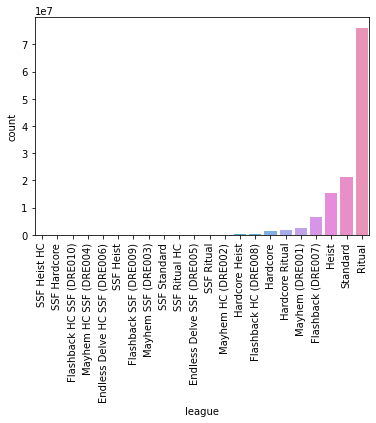

In [8]:
sns.barplot(x="league", y="count", data=public_leagues)
plt.xticks(rotation=90)
plt.show()

Let's also remove SSF leagues, because we are only interested in trade leagues.

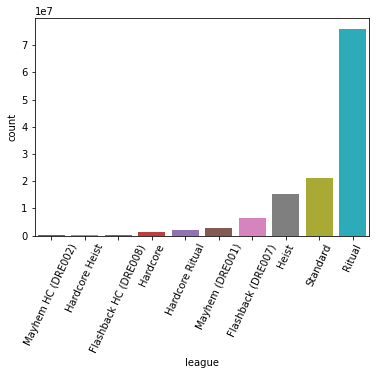

In [9]:
g = sns.barplot(x="league", y="count", data=public_leagues[public_leagues["league"].str.contains("SSF") == False])
plt.xticks(rotation=65)
plt.show()

This makes sense, since the Mayhem and Flashback leagues were only one and two weeks long respectively.

Lets take a look at the more fine-grained account-level activity data.

# Dataset 2 - stash_record traffic per league per account name

Here, we have a single .csv for each league from above with the same shape.

Lets take a look at Ritual for now, as it contains the largest amount of data by far (see bar-chart above).

In [10]:
df = pd.read_csv("./datasets/league_stats/league_Ritual.csv")

In [11]:
df["timespan_seconds"] = df.apply(lambda x: (parser.parse(x["max"]) - parser.parse(x["min"])).total_seconds(), axis=1)

In [12]:
df.head(20)

,account_name,count,min,max,timespan_seconds
0,Hadrancs,34749,2021-01-15 20:14:08.418432,2021-02-02 01:01:48.805364,1.486060e+06
1,冬瓜糖,21914,2021-01-15 20:30:48.340299,2021-02-02 05:02:53.911036,1.499526e+06
2,도비도스,21623,2021-01-15 21:19:55.27413,2021-02-01 23:51:54.262369,1.477919e+06
3,mikeclayton,20369,2021-01-15 23:03:16.463954,2021-02-02 22:33:46.922862,1.553430e+06
4,Mouzpad,18150,2021-01-15 22:02:43.063804,2021-02-02 22:31:36.539048,1.556933e+06
5,Krylios,17721,2021-01-15 21:44:51.985017,2021-02-02 04:53:03.183075,1.494491e+06
6,CuteDog_,16998,2021-01-16 00:07:50.042726,2021-02-02 05:44:32.762878,1.489003e+06
7,ratlato1112,15159,2021-01-16 04:19:20.547709,2021-02-02 05:04:39.170162,1.471519e+06
8,kezwikthemovie,14688,2021-01-15 20:52:01.743656,2021-02-02 03:02:12.033586,1.491010e+06
9,onlyp,14018,2021-01-15 20:17:40.444715,2021-02-02 05:43:30.35889,1.502750e+06


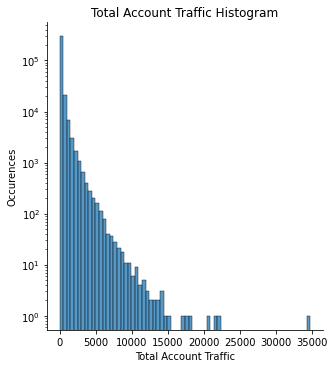

In [13]:
g = sns.displot(df["count"], bins=70)
g.set(yscale="log")
plt.xlabel("Total Account Traffic")
plt.ylabel("Occurences")
plt.title("Total Account Traffic Histogram")
plt.show()

As expected, the majority of accounts create only small amounts of stash_record traffic, while a few hundred accounts churn out large amounts of stash_record updates by themselves.

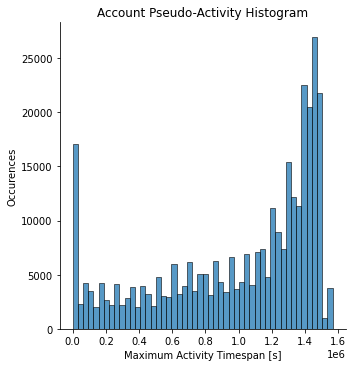

In [14]:
g = sns.displot(df["timespan_seconds"], bins=50)
plt.xlabel("Maximum Activity Timespan [s]")
plt.ylabel("Occurences")
plt.title("Account Pseudo-Activity Histogram")
plt.show()

Here we can see an exponential relationship between the number of active accounts and their active timespan.

Since our naive analysis only considers the first and last recorded stash_record as range markerrs for the activity timespan of an account, above histogram is not expressive when judging account activity. For example, the same graph could result from all accounts only logging in and triggering stash_record traffic two times throughout the whole league. 

Therefore we should dismiss this piece of visualization for now and come back later, if a need arrives to look further into account activity. 
However, we must then differentiate between sporadic and continuous account activity.

In [15]:
df.describe(percentiles=[0.03, 0.05, 0.1, 0.3, 0.75, 0.8, 0.85, 0.9, 0.95, 0.999])

,count,timespan_seconds
count,331283.000000,3.312830e+05
mean,229.708382,9.951637e+05
std,511.099522,4.714554e+05
min,1.000000,0.000000e+00
3%,2.000000,9.755273e+02
5%,3.000000,2.604744e+04
10%,7.000000,1.874010e+05
30%,35.000000,7.754923e+05
50%,84.000000,1.173474e+06
75%,221.000000,1.397748e+06


Above percentiles confirm our Zipfian observations from earlier: The most active 0.1% of accounts creates between 5.7k - ~35k stash_records in traffic alone.

<AxesSubplot:xlabel='timespan_seconds', ylabel='count'>

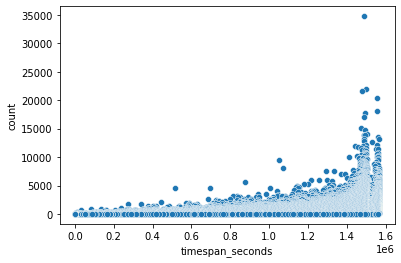

In [16]:
sns.scatterplot(data=df, y="count", x="timespan_seconds")

As noted above, the `timespan_seconds` data points are not robust enough to base anything onto, so this scatter-plot is just there for fun.

## A naive metric for account activity

In [17]:
def add_activity(df):
    # As a soft metric, lets devise `traffic/time` to differentiate between sporadically and continuously active accounts
    # This should be fine, as we assume the underlying data was collected by sampling at regular intervals
    df["activity"] = df.apply(lambda x: x["count"] / (x["timespan_seconds"] + 1), axis=1)
    
    # lets also normalize it right away
    max_activity = df["activity"].max()
    df["activity"] = (df["activity"] / max_activity)
    
    # lets also normalize traffic
    df["count"] = df["count"] / df["count"].max()
    
    return df

In [18]:
df = add_activity(df)

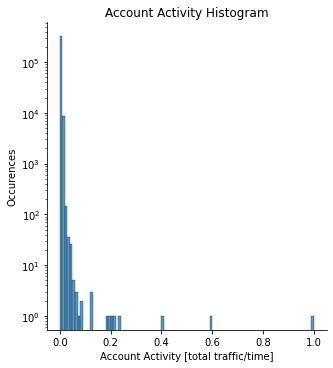

In [19]:
g = sns.displot(df["activity"], bins=100)
plt.xlabel("Account Activity [total traffic/time]")
plt.ylabel("Occurences")
plt.title("Account Activity Histogram")
plt.yscale("log")
plt.show()

Here we plot a more realistic account activity metric, defined by `traffic / maximum timespan [s]`, which seems highly exponential. Nothing we didnt expect, though.

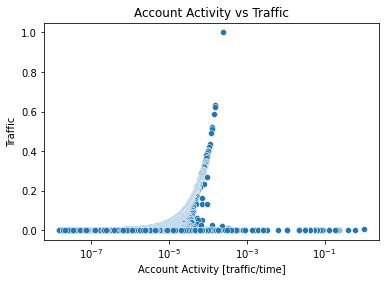

In [20]:
sns.scatterplot(data=df, y="count", x="activity")
plt.ylabel("Traffic")
plt.xlabel("Account Activity [traffic/time]")
plt.title("Account Activity vs Traffic")
plt.xscale("log")

This seems weird. This plot says the most traffic actually originates from not-so-active accounts, while active accounts do not produce much or even any traffic, according to our naive metric.

In [21]:
df.sort_values(by="timespan_seconds", ascending=True).head(10)

,account_name,count,min,max,timespan_seconds,activity
331282,타요정,0.000029,2021-01-26 13:50:40.281837,2021-01-26 13:50:40.281837,0.0,0.010671
325491,OnlyMove,0.000029,2021-02-02 22:31:26.532211,2021-02-02 22:31:26.532211,0.0,0.010671
325492,lotu555,0.000029,2021-01-22 15:57:26.358044,2021-01-22 15:57:26.358044,0.0,0.010671
325493,frenky0001,0.000029,2021-01-29 22:59:34.957007,2021-01-29 22:59:34.957007,0.0,0.010671
325494,Catarin,0.000029,2021-01-26 01:33:09.273675,2021-01-26 01:33:09.273675,0.0,0.010671
325495,slim4lomonn,0.000029,2021-01-30 23:26:11.086888,2021-01-30 23:26:11.086888,0.0,0.010671
325496,Slim832,0.000029,2021-01-29 21:11:54.496422,2021-01-29 21:11:54.496422,0.0,0.010671
325497,onlyred69,0.000029,2021-01-24 18:05:55.596754,2021-01-24 18:05:55.596754,0.0,0.010671
325498,slimifyd,0.000029,2021-01-24 18:03:01.877298,2021-01-24 18:03:01.877298,0.0,0.010671
325499,onlyry,0.000029,2021-01-17 17:43:42.194523,2021-01-17 17:43:42.194523,0.0,0.010671


Oopsie, we should probably remove these accounts that just played a few seconds.

As we can see in above percentile table, the least active 10% (looking at low `timespan_seconds`) didnt even play for 10000s (according to our, eh, simple measurements).

Thats not a whole lot for Path of Exile, so lets remove those accounts.

In [29]:
df_active = df[df.timespan_seconds > 100000]
#df_active = df_active[df_active["count"] < 15000] # filter out these ~10-20 guys with 15k-35k traffic score
df_active = add_activity(df_active)
#df_active = df_active[df_active.activity < 1] # filter out one guy with high activity but low total traffic (playing relatively short but high traffic in that timeframe)
#df_active = add_activity(df_active)

<ipython-input-17-3e8203e7d320>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["activity"] = df.apply(lambda x: x["count"] / (x["timespan_seconds"] + 1), axis=1)
<ipython-input-17-3e8203e7d320>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["activity"] = (df["activity"] / max_activity)
<ipython-input-17-3e8203e7d320>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Text(0.5, 1.0, 'Account Activity vs Account Traffic')

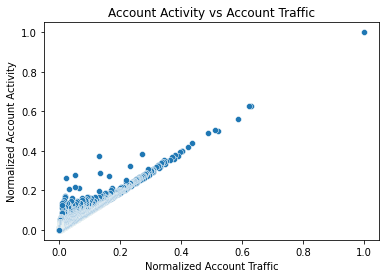

In [34]:
sns.scatterplot(data=df_active, x="count", y="activity")
plt.xlabel("Normalized Account Traffic")
plt.ylabel("Normalized Account Activity")
plt.title("Account Activity vs Account Traffic")

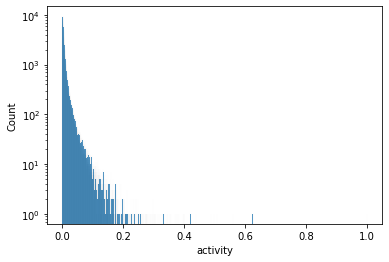

In [36]:
sns.histplot(data=df_active, x="activity")
plt.yscale("log")

Okay, this looks much better than before.

interpretation
- high total traffic implies constantly high player activity (top right corner)
    - they are not extraordinarily time-efficient, but constant
    - they are in the minority
- the majority of accounts falls into the lower left corner -> less activity, and less traffic
    - they play slower, creating less traffic in the same time as faster players
    - at the same time, a part of these players are more active (create as much traffic, but in less time) (outliers towards the top)
- we see an invisible border guarding a linear relationship because our API sampling introduces a lower bound on our derived `account activity` metric. at least thats my 3am intuition. 

More thoughts regarding the border:

The activity score of a specific account is currently defined as `account activity` = `total account traffic / maximum observed timespan`. 
The `maximum observed timespan` is always upper-bounded by the length of a league. 
The maximum activity an account can reach would be each stash change triggering a new stash_record update in real-time. 

However, the API river itself and our indexer both sample at their own pre-defined rates, so several changes are being combined into updates, which reduces the total amount of `traffic`. 
Here, we define `traffic` as the number of stash_record updates an account triggers, because that is the granularity we receive from the API river. 

Assuming our indexer has a more-or-less constant sampling rate, this rate creates a lower bound on the ratio between our derived `account activity` and observed `account traffic`, because there is no way to observe less traffic in the same time (or the same traffic in more time)

thoughts:
- 1) less traffic in the same time would mean the dot to go towards the bottom left (note: this is not a regular 2D scatter plot between two independent variables)
- 2) same traffic in more time would mean the dot to go straight down
- 3) more traffic in the same time would mean the dot to go towards the top right
- 4) same traffic in less time would mean the dot to go straight up

I don't know how to imply aynthing from this though.

Text(0.5, 1.0, 'Maximum Observed Timespan vs Account Activity')

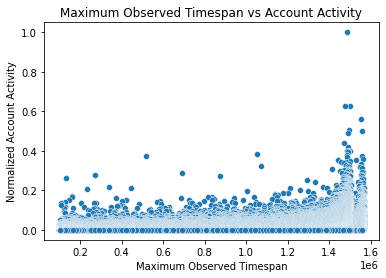

In [33]:
sns.scatterplot(data=df_active, x="timespan_seconds", y="activity")
plt.xlabel("Maximum Observed Timespan")
plt.ylabel("Normalized Account Activity")
plt.title("Maximum Observed Timespan vs Account Activity")

Observations:

- Most players are not very active in respect to our activity metric throughout the timespan they play the game
- Account activity rises exponentially after 1.4kk seconds of play time, but has a strong slope and a smaller exponential tail at around 1.5kk seconds of play time
- The most active accounts play a lot more than the majority of the playerbase
- Across all timespan regions, there are outliers in terms of account activity